In [54]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry.point import Point
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

In [3]:
commuting_flow_path = r'D:\NUS\project\LTA_data\commuting_flow_matrix'
lis_file = os.listdir(path=commuting_flow_path)
lis_file

['bus',
 'mt_clusters_2020.csv',
 'mt_clusters_2021.csv',
 'mt_early_cases.csv',
 'mt_phase1.csv',
 'mt_phase2.csv',
 'mt_phase3.csv',
 'mt_phase4.csv',
 'sum',
 'train']

In [27]:
region = gpd.read_file(r"D:\NUS\project\Singapore_subzone\region_2019\sg_island_region.shp")
szone = gpd.read_file(r"D:\NUS\project\Singapore_subzone\subzone_2019\MasterPlan_SUBZONE_2019\master-plan-2019-subzone-boundary-no-sea-geojson-polygon.shp")
lis_szone = list(set(szone['SUBZONE_N']))
print('the nimber of subzone is: {}'.format(len(lis_szone)))

the nimber of subzone is: 332


In [80]:
# connection matrix for clusters
mt_path_2020 = r'D:\NUS\project\LTA_data\commuting_flow_matrix\sum\2020'
mt_path_2021 = r'D:\NUS\project\LTA_data\commuting_flow_matrix\sum\2021'
lis_file_2020 = os.listdir(path=mt_path_2020)
lis_file_2021 = os.listdir(path=mt_path_2021)
mt_2020 = pd.read_csv(mt_path_2020+'\\'+lis_file_2020[0])
mt_2021 = pd.read_csv(mt_path_2021+'\\'+lis_file_2021[0])
for i in lis_file_2020:
    mt_tmp = pd.read_csv(mt_path_2020+'\\'+i)
    mt_2020.iloc[:,1:] = mt_2020.iloc[:,1:]+mt_tmp.iloc[:,1:]
mt_2020.iloc[:,1:] = mt_2020.iloc[:,1:]/12
    
for i in lis_file_2021:
    mt_tmp = pd.read_csv(mt_path_2021+'\\'+i)
    mt_2021.iloc[:,1:] = mt_2021.iloc[:,1:]+mt_tmp.iloc[:,1:]
mt_2021.iloc[:,1:] = mt_2021.iloc[:,1:]/12

In [18]:
#connection matrix for covid visit
mt_path_2021 = r'D:\NUS\project\LTA_data\commuting_flow_matrix\sum\2021'
mt_path_2022 = r'D:\NUS\project\LTA_data\commuting_flow_matrix\sum\2022'
lis_file_2021 = os.listdir(path=mt_path_2021)
lis_file_2022 = os.listdir(path=mt_path_2022)
mt_2021_10 = pd.read_csv(mt_path_2021+'\\'+lis_file_2021[1])
mt_2021_11 = pd.read_csv(mt_path_2021+'\\'+lis_file_2021[2])
mt_2021_12 = pd.read_csv(mt_path_2021+'\\'+lis_file_2021[3])
mt_2022_01 = pd.read_csv(mt_path_2022+'\\'+lis_file_2022[0])
mt_2022_02 = pd.read_csv(mt_path_2022+'\\'+lis_file_2022[1])
mt_2022_03 = pd.read_csv(mt_path_2022+'\\'+lis_file_2022[2])
mt_2022_04 = pd.read_csv(mt_path_2022+'\\'+lis_file_2022[3])

mt_phase1 = mt_2021_10

mt_phase2 = mt_2021_11
mt_phase2.iloc[:,1:] = mt_phase2.iloc[:,1:]+mt_2021_12.iloc[:,1:]
mt_phase2.iloc[:,1:] = mt_phase2.iloc[:,1:]+mt_2022_01.iloc[:,1:]
mt_phase2.iloc[:,1:] = mt_phase2.iloc[:,1:]/3

mt_phase3 = mt_2022_02
mt_phase3.iloc[:,1:] = mt_phase3.iloc[:,1:]+mt_2022_02.iloc[:,1:]
mt_phase3.iloc[:,1:] = mt_phase3.iloc[:,1:]/2

mt_phase4 = mt_2022_03
mt_phase4.iloc[:,1:] = mt_phase4.iloc[:,1:]+mt_2022_04.iloc[:,1:]
mt_phase4.iloc[:,1:] = mt_phase4.iloc[:,1:]/2

In [81]:
lis_mt = [mt_2020,mt_2021,mt_phase1,mt_phase2,mt_phase3,mt_phase4]

In [82]:
def get_od_pairs(df):
    df_mt = pd.DataFrame(columns = ['Origin_Subzone','Destinatoin_Subzone','Total_Trips'])
    cols = df.columns[1:]
    count = 0
    for i in cols:
        for x in range(len(df)):
            lis_tmp = [i,df.iloc[x,0],df.loc[x,i]]
            df_mt.loc[count,['Origin_Subzone','Destinatoin_Subzone','Total_Trips']] = lis_tmp
            del(lis_tmp)
            count += 1
    return df_mt

In [83]:
df_mt_commuting_flow_2020 = get_od_pairs(lis_mt[0])
df_mt_commuting_flow_2021 = get_od_pairs(lis_mt[1])

In [25]:
df_mt_commuting_flow_phase1 = get_od_pairs(lis_mt[2])
df_mt_commuting_flow_phase2 = get_od_pairs(lis_mt[3])
df_mt_commuting_flow_phase3 = get_od_pairs(lis_mt[4])
df_mt_commuting_flow_phase4 = get_od_pairs(lis_mt[5])

In [84]:
points = gpd.GeoSeries([Point(102.7,1.25), Point(103.7, 1.25)], crs=4326)
points = points.to_crs('EPSG:3414')
distance_meters = points[0].distance(points[1])
distance_meters

111301.44035524513

In [192]:
def plt_commuting_flow(df,subzone,vmax):
    fig, ax = plt.subplots(figsize = (20, 8))
    szone.plot(ax = ax,facecolor = "none",ec = "grey")
    region.plot(ax = ax,facecolor = "none",ec = "black",label = "Region")
    
    for i in range(len(df)):
        slon = subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Origin_Subzone']]['X_COORD'].values[0]
        slat = subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Origin_Subzone']]['Y_COORD'].values[0]
        dlon = subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Destinatoin_Subzone']]['X_COORD'].values[0]
        dlat = subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Destinatoin_Subzone']]['Y_COORD'].values[0]
        volumns =  df.loc[i,'Total_Trips']
        if subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Origin_Subzone']]['REGION_C'].values[0] == 'NR':
            plt.plot([slon , dlon], [slat, dlat], linewidth=volumns/(vmax*3), color="red", alpha=0.8)
            plt.scatter( [slon],[slat],color="black", alpha=0.1, s=volumns/(vmax/4))
        elif subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Origin_Subzone']]['REGION_C'].values[0] == 'NER':
            plt.plot([slon , dlon], [slat, dlat], linewidth=volumns/(vmax*3), color="blue", alpha=0.8)
            plt.scatter( [slon],[slat],color="black", alpha=0.1, s=volumns/(vmax/4))
        elif subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Origin_Subzone']]['REGION_C'].values[0] == 'ER':
            plt.plot([slon , dlon], [slat, dlat], linewidth=volumns/(vmax*3), color="yellow", alpha=0.8)
            plt.scatter( [slon],[slat],color="black", alpha=0.1, s=volumns/(vmax/4))
        elif subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Origin_Subzone']]['REGION_C'].values[0] == 'CR':
            plt.plot([slon , dlon], [slat, dlat], linewidth=volumns/(vmax*3), color="lime", alpha=0.8)
            plt.scatter( [slon],[slat],color="black", alpha=0.1, s=volumns/(vmax/4))
        elif subzone.loc[subzone['SUBZONE_N'] == df.loc[i,'Origin_Subzone']]['REGION_C'].values[0] == 'WR':
            plt.plot([slon , dlon], [slat, dlat], linewidth=volumns/(vmax*3), color="orange", alpha=0.8)
            plt.scatter( [slon],[slat],color="black", alpha=0.1, s=volumns/(vmax/4))
            
    ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))

In [193]:
def draw_connection_map(df,V):
    df_5000 = df.loc[(df['Total_Trips']>V)].copy()
    df_5000.index = range(len(df_5000))
    df_5000
    plt_commuting_flow(df_5000,szone,V/2)

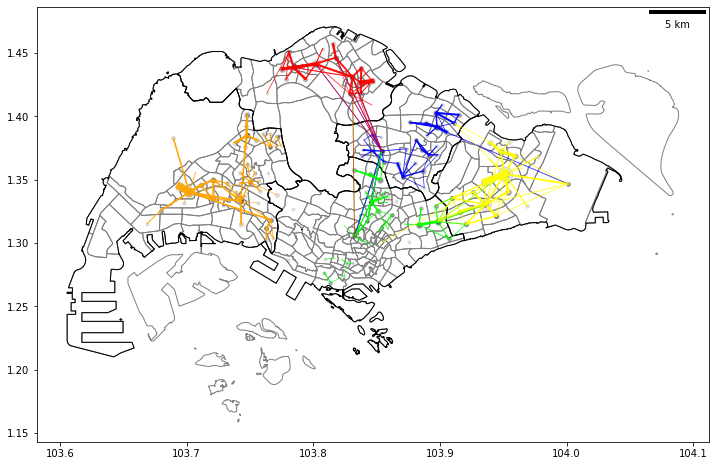

In [194]:
draw_connection_map(df_mt_commuting_flow_2020,50000)

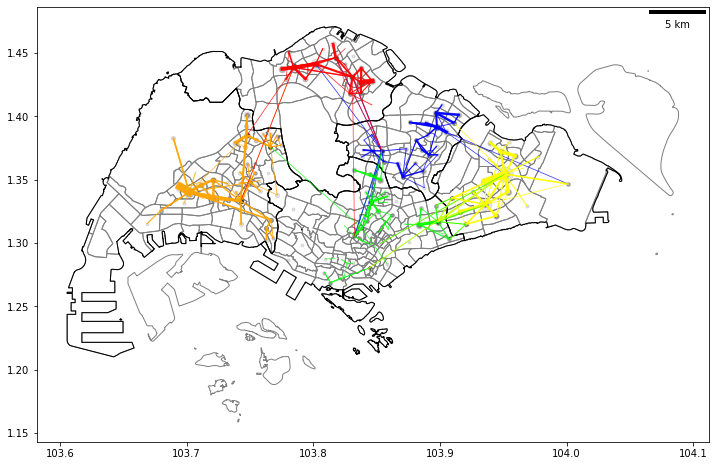

In [195]:
draw_connection_map(df_mt_commuting_flow_2021,50000)

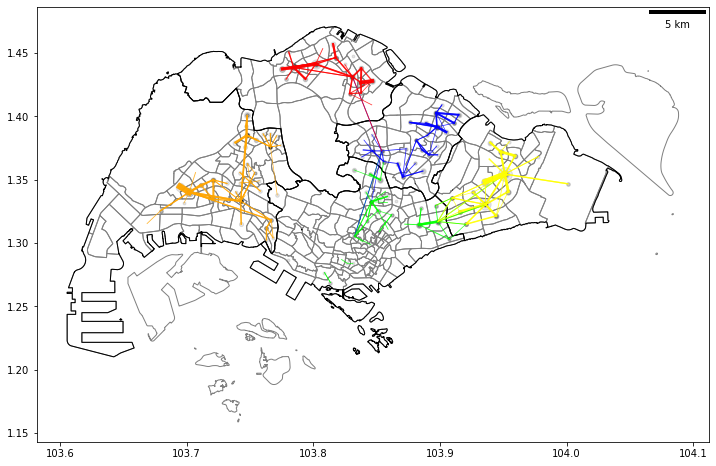

In [196]:
draw_connection_map(df_mt_commuting_flow_phase1,50000)

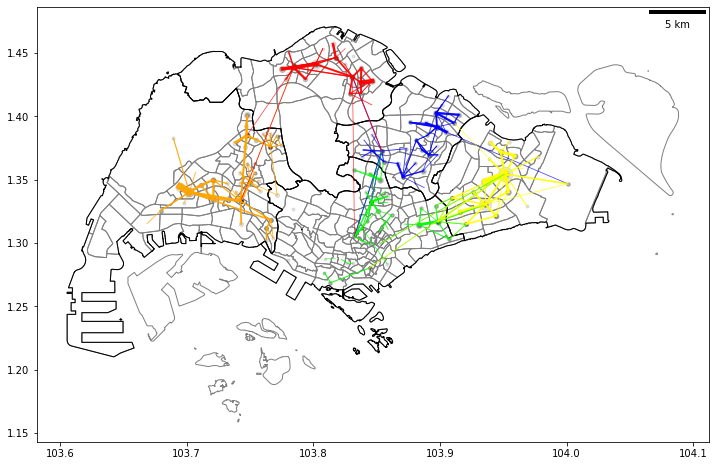

In [197]:
draw_connection_map(df_mt_commuting_flow_phase2,50000)

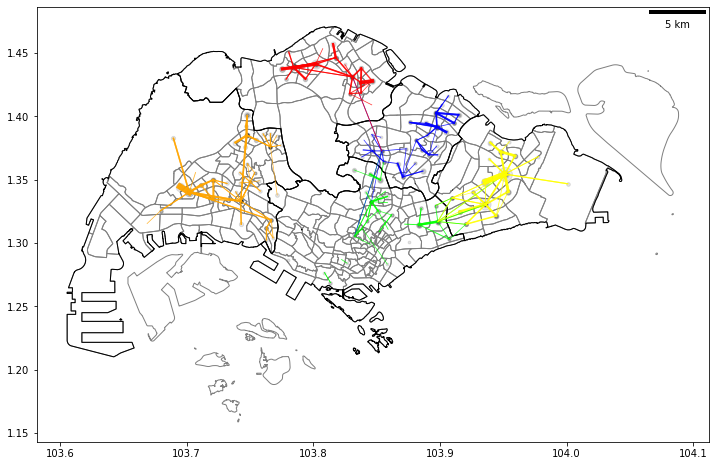

In [198]:
draw_connection_map(df_mt_commuting_flow_phase3,50000)

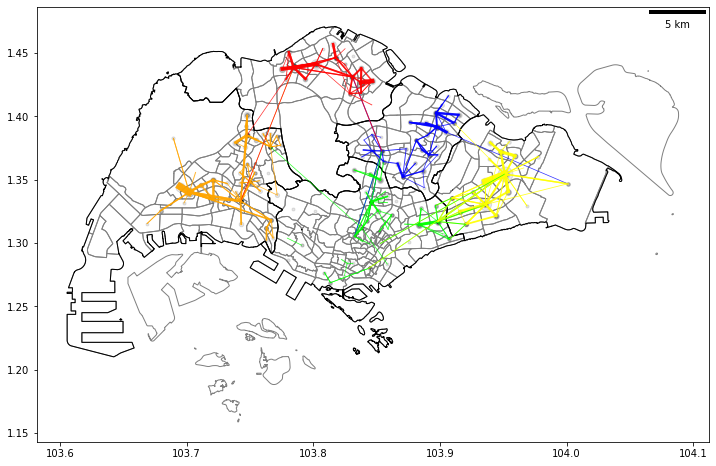

In [199]:
draw_connection_map(df_mt_commuting_flow_phase4,50000)

In [101]:
lis_mt[0].to_csv(r'D:\NUS\project\LTA_data\od_comuting_flow\commuting_flow_2020.csv',index = False)
lis_mt[1].to_csv(r'D:\NUS\project\LTA_data\od_comuting_flow\commuting_flow_2021.csv',index = False)
lis_mt[2].to_csv(r'D:\NUS\project\LTA_data\od_comuting_flow\commuting_flow_phase1.csv',index = False)
lis_mt[3].to_csv(r'D:\NUS\project\LTA_data\od_comuting_flow\commuting_flow_phase2.csv',index = False)
lis_mt[4].to_csv(r'D:\NUS\project\LTA_data\od_comuting_flow\commuting_flow_phase3.csv',index = False)
lis_mt[5].to_csv(r'D:\NUS\project\LTA_data\od_comuting_flow\commuting_flow_phase4.csv',index = False)

In [111]:
mt_2020 = pd.read_csv(commuting_flow_path+'\\'+lis_file[1])
mt_2021 = pd.read_csv(commuting_flow_path+'\\'+lis_file[2])
mt_phase1 = pd.read_csv(commuting_flow_path+'\\'+lis_file[4])
mt_phase2 = pd.read_csv(commuting_flow_path+'\\'+lis_file[5])
mt_phase3 = pd.read_csv(commuting_flow_path+'\\'+lis_file[6])
mt_phase4 = pd.read_csv(commuting_flow_path+'\\'+lis_file[7])

In [113]:
lis_mt = [mt_2020,mt_2021,mt_phase1,mt_phase2,mt_phase3,mt_phase4]

In [115]:
for i in lis_mt:
    i['PROP_PT'] = 0
    for x in range(len(i)):
        i.loc[x,'PROP_PT'] = sum(i.iloc[x,1:333])

In [124]:
#dependent variable
subzone = gpd.read_file(r"C:\Users\YOLO\Desktop\sg_clusters\subzone\clusters_by_szone.shp")
dependent_var1 = pd.DataFrame(columns = ['SUBZONE_N'])
dependent_var1['SUBZONE_N'] = subzone['SUBZONE_N']
dependent_var1['dorm_clusters'] = subzone['dorm_2020']
dependent_var1['comm_clusters'] = subzone['comm_clust']
dependent_var1['clusters_2020'] = subzone['clusters_2']
dependent_var1['clusters_2021'] = subzone['clusters_1']
dependent_var1 = dependent_var1.sort_values('SUBZONE_N',ascending = True).reset_index()
dependent_var1 = dependent_var1.drop('index',axis = 1)

In [157]:
visit = pd.read_csv(r"C:\Users\YOLO\Desktop\sg_subzone_avg_visit_ratio.csv")
visit_density = gpd.read_file(r"C:\Users\YOLO\Desktop\covid visit spatial analysis\new_phase\covid-visit-density\covid_visit_density.shp")
cols1 = ['SUBZONE_N','Phase1_AVG','Phase2_AVG','Phase3_AVG','Phase4_AVG']
cols2 = ['SUBZONE_N','P1_density','P2_density','P3_density','P4_density']
dependent_var2 = pd.DataFrame(columns = cols2)
for i in cols2:
    dependent_var2[i] = visit_density[i]
missing_szone = ['JURONG ISLAND AND BUKOM', 'NORTH-EASTERN ISLANDS', 'SEMAKAU', 'SUDONG']     
for i in missing_szone:
    dependent_var2 = dependent_var2.loc[(dependent_var2['SUBZONE_N']!=i)].copy()
dependent_var2.index = range(len(dependent_var2))

In [131]:
def remove_subzone(mt,df):
    missing_szone = []
    lis1 = list(mt['SUBZONE_N'])
    lis2 = list(df['SUBZONE_N'])
    for i in lis1:
        if not (i in lis2):
            missing_szone.append(i)
            
    print(missing_szone)
    cf_df = mt.drop(missing_szone,axis = 1)

    for i in missing_szone:
        cf_df = cf_df.loc[(cf_df['SUBZONE_N']!=i)].copy()
    cf_df.index = range(len(cf_df))
    return cf_df

In [133]:
mt_2020_remove = remove_subzone(mt_2020,dependent_var1)
mt_2021_remove = remove_subzone(mt_2020,dependent_var1)
mt_phase1_remove = remove_subzone(mt_phase1,dependent_var1)
mt_phase2_remove = remove_subzone(mt_phase2,dependent_var1)
mt_phase3_remove = remove_subzone(mt_phase3,dependent_var1)
mt_phase4_remove = remove_subzone(mt_phase4,dependent_var1)

['JURONG ISLAND AND BUKOM', 'NORTH-EASTERN ISLANDS', 'SEMAKAU', 'SUDONG']
['JURONG ISLAND AND BUKOM', 'NORTH-EASTERN ISLANDS', 'SEMAKAU', 'SUDONG']
['JURONG ISLAND AND BUKOM', 'NORTH-EASTERN ISLANDS', 'SEMAKAU', 'SUDONG']
['JURONG ISLAND AND BUKOM', 'NORTH-EASTERN ISLANDS', 'SEMAKAU', 'SUDONG']
['JURONG ISLAND AND BUKOM', 'NORTH-EASTERN ISLANDS', 'SEMAKAU', 'SUDONG']
['JURONG ISLAND AND BUKOM', 'NORTH-EASTERN ISLANDS', 'SEMAKAU', 'SUDONG']


In [164]:
#commuting flow v.s. COVID visit
def draw_fig(df_mt,var,phase):
    PT = list(mt_phase1_remove['PROP_PT']*100)
    HW = list((1-mt_phase1_remove['PROP_PT'])*100)
    CV = list(var[phase])

    hw_array = np.array(HW)
    pt_array = np.array(PT)
    cv_array = np.array(CV)

    #plot scatter: pt v.s. early_cases
    m1,b1 = np.polyfit(pt_array, cv_array,1)
    fig1,ax1 = plt.subplots(figsize = (20,8))
    plt.xlim(-5,105)
    plt.xlabel('% of commuting volume from other subzone ', size=18)
    plt.ylabel('the density of COVID visit', size=18)
    ax1.scatter(PT, CV, c ="black")
    ax1.plot(pt_array, m1*pt_array+b1,c ="black")
    print(m1)

2.917664754825913e-07


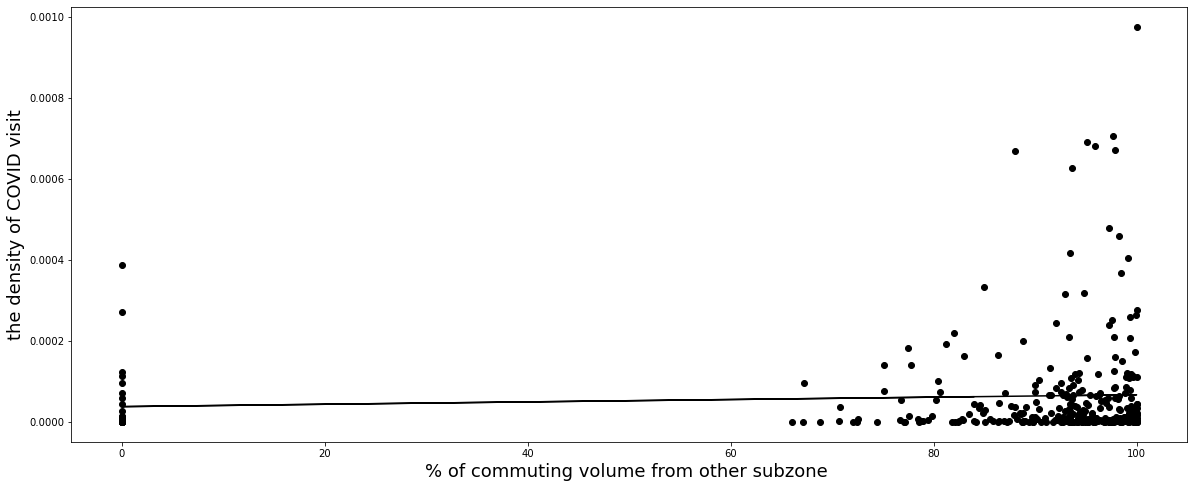

In [165]:
draw_fig(mt_phase1_remove,dependent_var2,'P1_density')

1.6155386241545346e-07


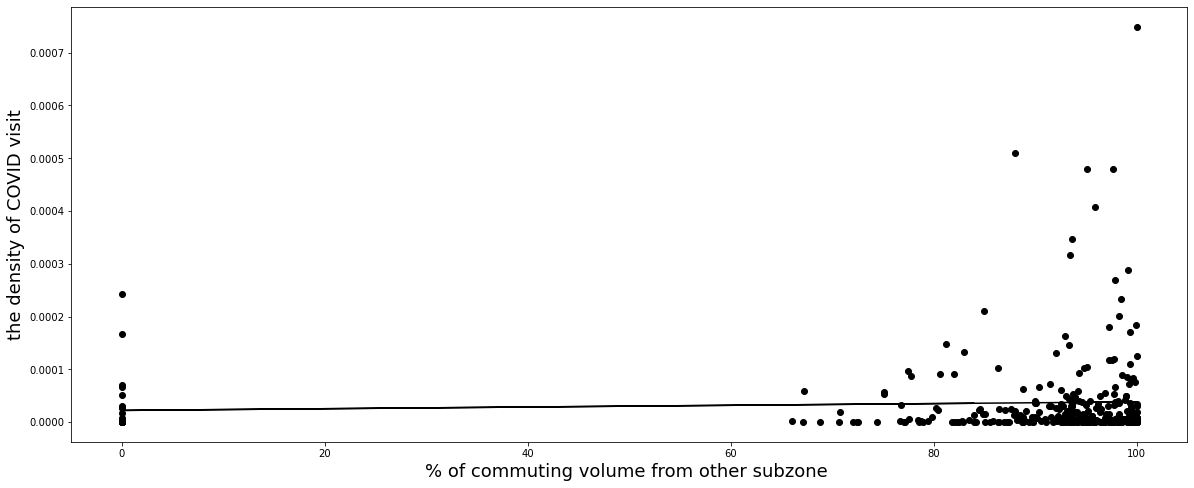

In [166]:
draw_fig(mt_phase2_remove,dependent_var2,'P2_density')

8.87325587819665e-07


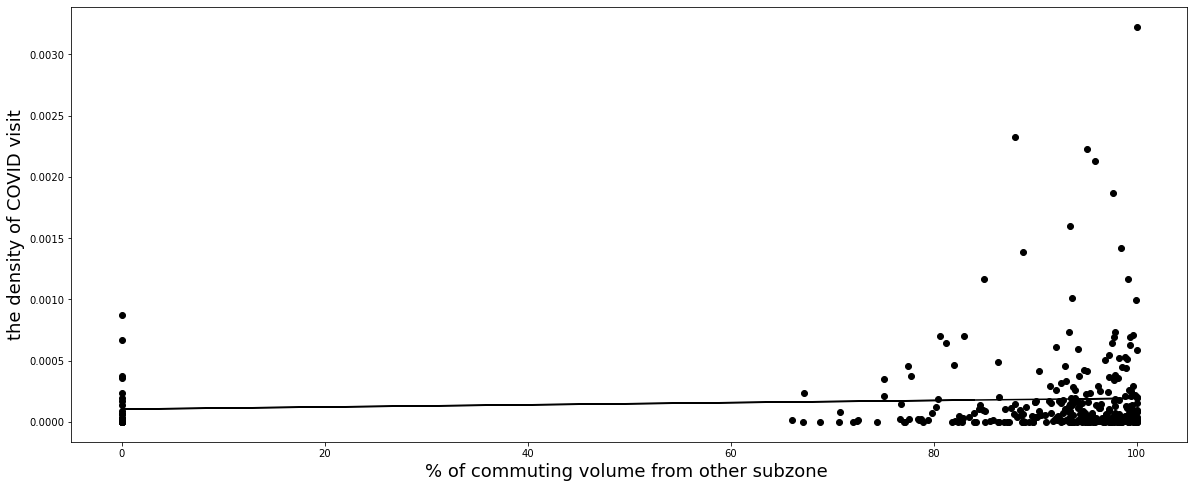

In [167]:
draw_fig(mt_phase3_remove,dependent_var2,'P3_density')

9.495258297743789e-07


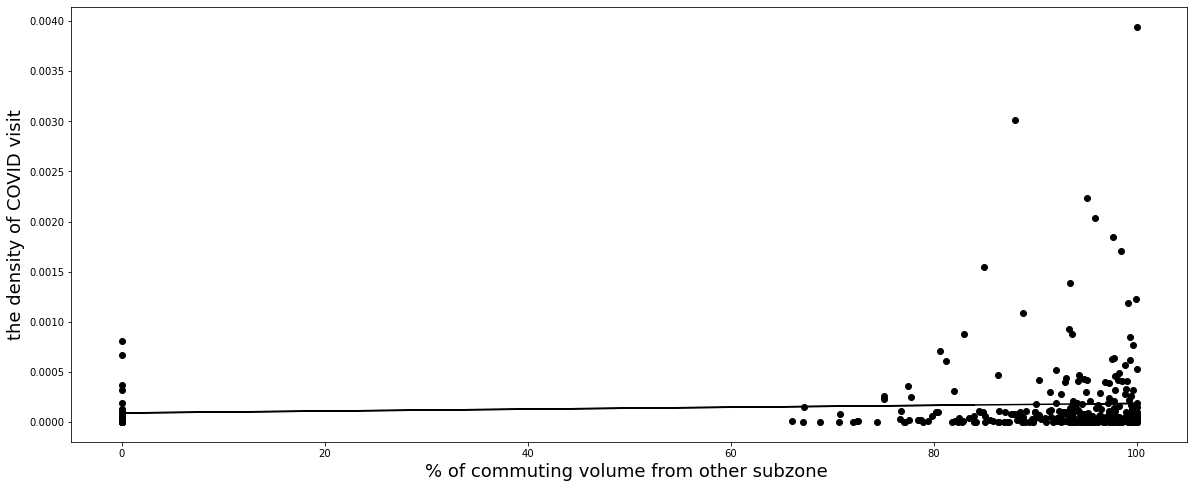

In [171]:
draw_fig(mt_phase4_remove,dependent_var2,'P4_density')

In [188]:
#commuting flow v.s. COVID cluster
def draw_fig(df_mt,var,phase):
    PT = list(mt_phase1_remove['PROP_PT']*100)
    HW = list((1-mt_phase1_remove['PROP_PT'])*100)
    CV = list(var[phase])

    hw_array = np.array(HW)
    pt_array = np.array(PT)
    cv_array = np.array(CV)

    #plot scatter: pt v.s. early_cases
    m1,b1 = np.polyfit(pt_array, cv_array,1)
    fig1,ax1 = plt.subplots(figsize = (20,8))
    plt.xlim(-5,105)
    plt.xlabel('% of commuting volume from other subzone ', size=18)
    plt.ylabel('the number of COVID cluster', size=18)
    ax1.scatter(PT, CV, c ="black")
    ax1.plot(pt_array, m1*pt_array+b1,c ="black")
    print(m1)

0.004352993785941982


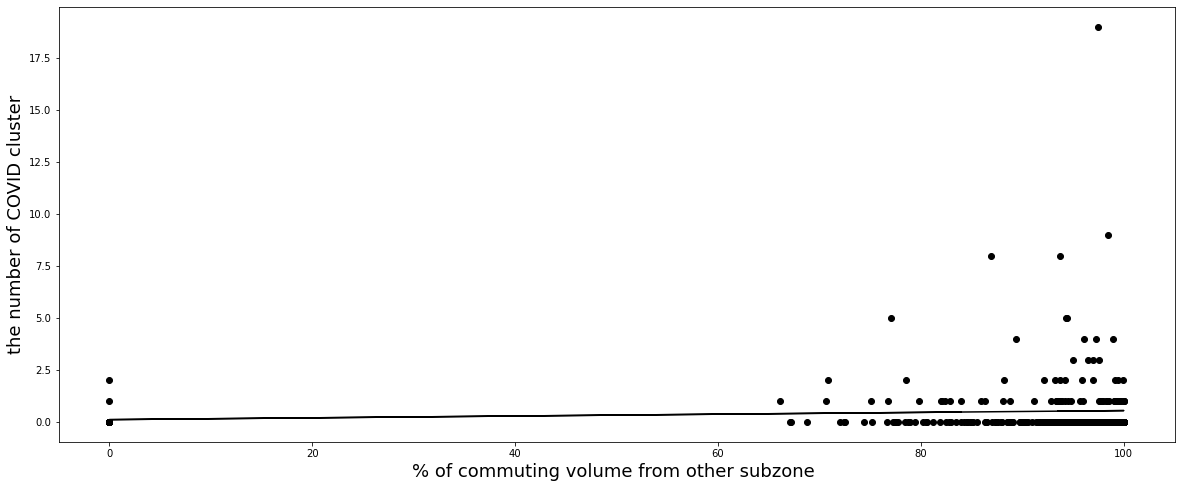

In [189]:
draw_fig(mt_2020_remove,dependent_var1,'clusters_2020')

0.002218222171585299


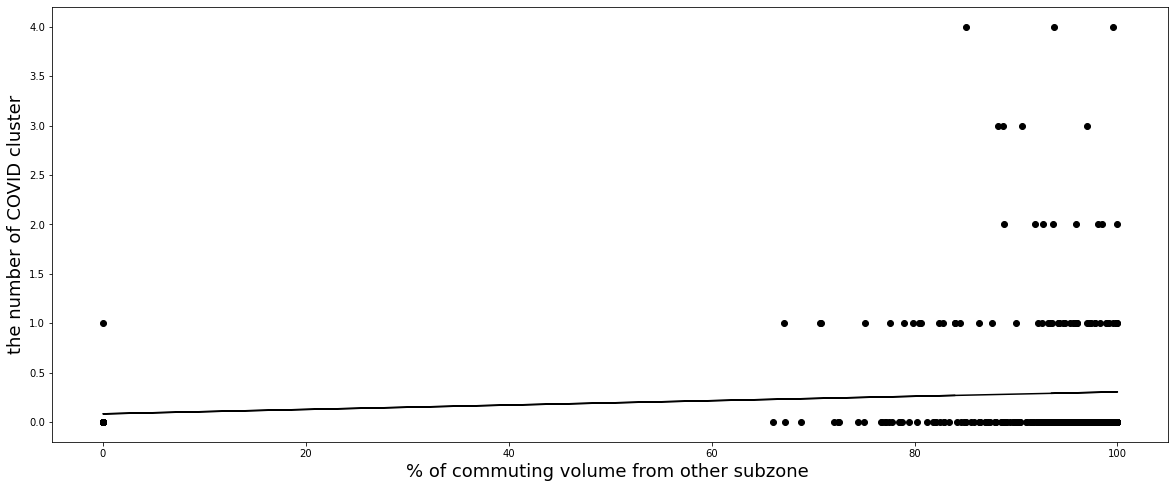

In [190]:
draw_fig(mt_2021_remove,dependent_var1,'clusters_2021')